In [27]:
import pandas as pd
#Cerinta 1
df = pd.read_csv('train.csv') 

print("Informatii despre colaone:")
print(df.info())
print("\nValori lipsa in fiecare coloana:")
print(df.isnull().sum())
print("\nNumarul de linii duplicate:", df.duplicated().sum())
print("\nNumar total de linii:", len(df))
print("Numar total de coloane:", len(df.columns))

Informatii despre colaone:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Valori lipsa in fiecare coloana:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare   

Procente supravietuire si deces:
Survived
0    61.616162
1    38.383838
Name: count, dtype: float64
Procente pasageri pe clase:
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64
Procente barbati si femei:
Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


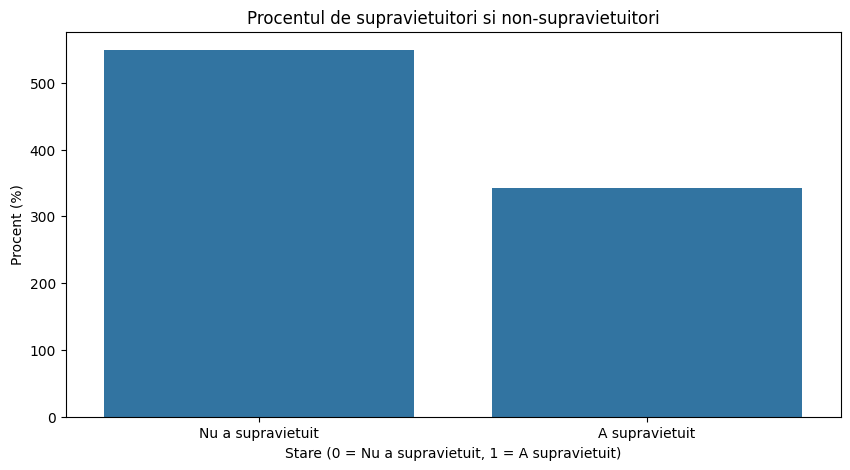

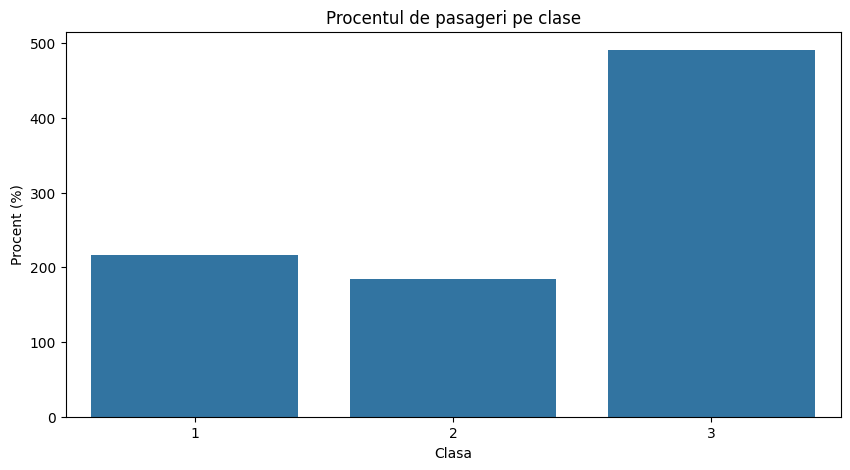

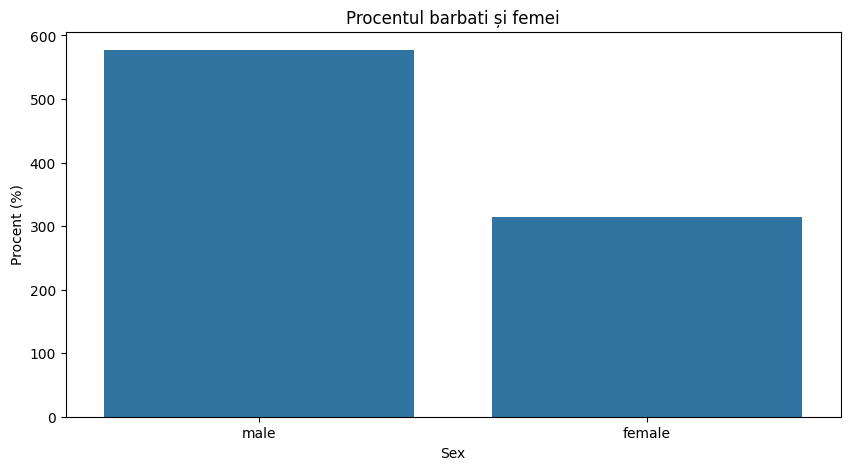

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 2
df = pd.read_csv('train.csv')
survival_count = df['Survived'].value_counts()
survival_percentage=(survival_count/survival_count.sum())*100
print("Procente supravietuire si deces:")
print(survival_percentage)
class_count = df['Pclass'].value_counts()
class_percentage = (class_count / class_count.sum()) * 100
print("Procente pasageri pe clase:")
print(class_percentage)

gender_count = df['Sex'].value_counts()
gender_percentage = (gender_count / gender_count.sum()) * 100
print("Procente barbati si femei:")
print(gender_percentage)

plt.figure(figsize=(10, 5))
sns.barplot(x=survival_count.index, y=survival_count.values)
plt.title('Procentul de supravietuitori si non-supravietuitori')
plt.xlabel('Stare (0 = Nu a supravietuit, 1 = A supravietuit)')
plt.ylabel('Procent (%)')
plt.xticks(ticks=[0, 1], labels=['Nu a supravietuit', 'A supravietuit'])
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=class_count.index, y=class_count.values)
plt.title('Procentul de pasageri pe clase')
plt.xlabel('Clasa')
plt.ylabel('Procent (%)')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title('Procentul barbati si femei')
plt.xlabel('Sex')
plt.ylabel('Procent (%)')
plt.show()


In [32]:
import pandas as pd
#Cerinta 4
df = pd.read_csv('train.csv')

missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # doar coloanele cu valori lipsa
missing_percent = (missing_data / len(df)) * 100

print("Numarul si procentul valorilor lipsa:")
print(pd.DataFrame({'Numar valori lipsa': missing_data, 'Procent': missing_percent}))

# Calculam procentul valorilor lipsa pe coloane în functie de starea de supravietuire
for column in missing_data.index:
    print(f"\nAnaliza pentru coloana: {column}")
    grouped = df.groupby('Survived')

    column_data = grouped[column]
    
    missing_data2 = column_data.apply(lambda x: x.isnull().sum())
    
    missing_data2=missing_data2/grouped.size()
    
    missing_percentage = missing_data2 * 100

    print(f"{column}")
    print(missing_percentage)



Numarul si procentul valorilor lipsa:
          Numar valori lipsa    Procent
Age                      177  19.865320
Cabin                    687  77.104377
Embarked                   2   0.224467

Analiza pentru coloana: Age
Age
Survived
0    22.768670
1    15.204678
dtype: float64

Analiza pentru coloana: Cabin
Cabin
Survived
0    87.613843
1    60.233918
dtype: float64

Analiza pentru coloana: Embarked
Embarked
Survived
0    0.000000
1    0.584795
dtype: float64


AgeGroup
21-40    385
0-20     179
41-60    128
61+       22
Name: count, dtype: int64


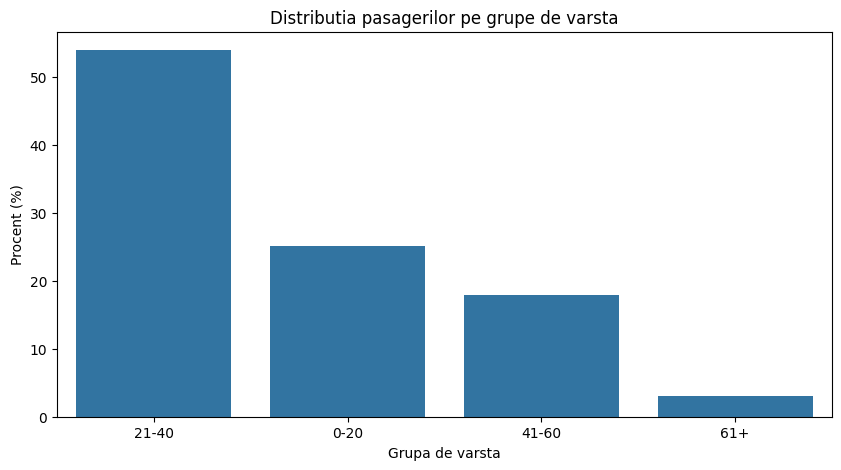

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 5
def classify_age(age):
    if pd.isnull(age):
        return None
    elif age <= 20:
        return'0-20'
    elif age <= 40:
        return '21-40'
    elif age <= 60:
        return '41-60'
    else:
        return '61+'

df = pd.read_csv('train.csv')
df['AgeGroup'] = df['Age'].apply(classify_age)
age_group_counts = df['AgeGroup'].value_counts()
print(age_group_counts)
age_group_percentage = (age_group_counts / age_group_counts.sum()) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_percentage.index, y=age_group_percentage.values)
plt.title('Distributia pasagerilor pe grupe de varsta')
plt.xlabel('Grupa de varsta')
plt.ylabel('Procent (%)')
plt.show()

Cati barbati au supravietuit:
AgeGroup
0-20     29
21-40    46
41-60    16
61+       2
Name: Survived, dtype: int64


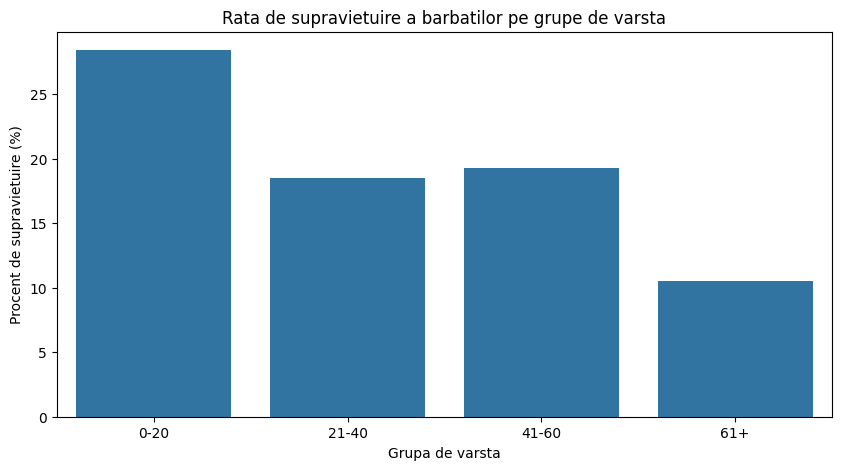

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Cerinta 6
def classify_age(age):
    if pd.isnull(age):
        return None
    elif age <= 20:
        return '0-20'
    elif age <= 40:
        return '21-40'
    elif age <= 60:
        return '41-60'
    else:
        return '61+'

df = pd.read_csv('train.csv')
df['AgeGroup'] = df['Age'].apply(classify_age)

men = df[df['Sex'] == 'male']

survival_rates = men.groupby('AgeGroup')['Survived'].sum()

print("Cati barbati au supravietuit:")
print(survival_rates)
total_men_by_agegroup = men.groupby('AgeGroup').size()
survival_rates=(survival_rates/total_men_by_agegroup)*100

plt.figure(figsize=(10, 5))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Rata de supravietuire a barbatilor pe grupe de varsta')
plt.xlabel('Grupa de varsta')
plt.ylabel('Procent de supravietuire (%)')
plt.show()


Procentul de copii la bord: 12.68%


C:\Users\thug\AppData\Local\Temp\ipykernel_19284\4010947433.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.98230088495575' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  survival_rates[True]=(survival_rates[True]/children_count)*100


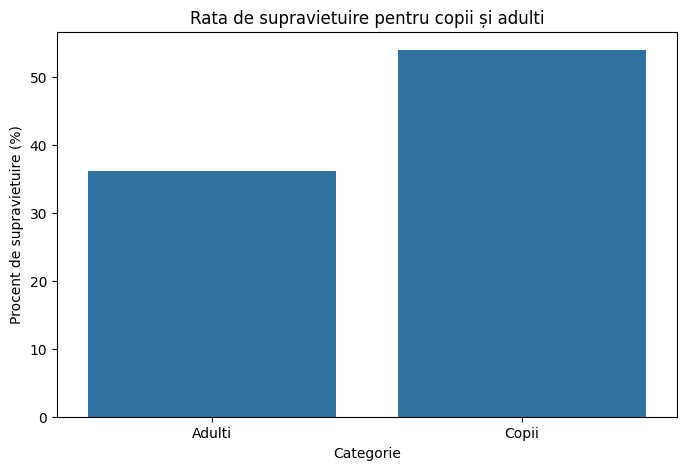

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 7
df = pd.read_csv('train.csv')
df['Copil'] = df['Age'] < 18

#calculul procentului de copii la bord
children_count = df['Copil'].sum()
children_percentage = (children_count / len(df)) * 100
print(f"Procentul de copii la bord: {children_percentage:.2f}%")

survival_rates = df.groupby('Copil')['Survived'].sum()
survival_rates[True]=(survival_rates[True]/children_count)*100
survival_rates[False]=(survival_rates[False]/(len(df)-children_count))*100


plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Rata de supravietuire pentru copii si adulti')
plt.xlabel('Categorie')
plt.ylabel('Procent de supravietuire (%)')
plt.xticks(ticks=[0, 1], labels=['Adulti', 'Copii'])
plt.show()


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
Procentul de corectitudine a titlurilor atribuite în funcție de sex:
Title
Capt        100.0
Col         100.0
Countess    100.0
Don         100.0
Dr          100.0
Jonkheer    100.0
Lady        100.0
Major       100.0
Master      100.0
Miss        100.0
Mlle        100.0
Mme         100.0
Mr          100.0
Mrs         100.0
Ms          100.0
Rev         100.0
Sir         100.0
dtype: float64


C:\Users\thug\AppData\Local\Temp\ipykernel_19284\3166695813.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')


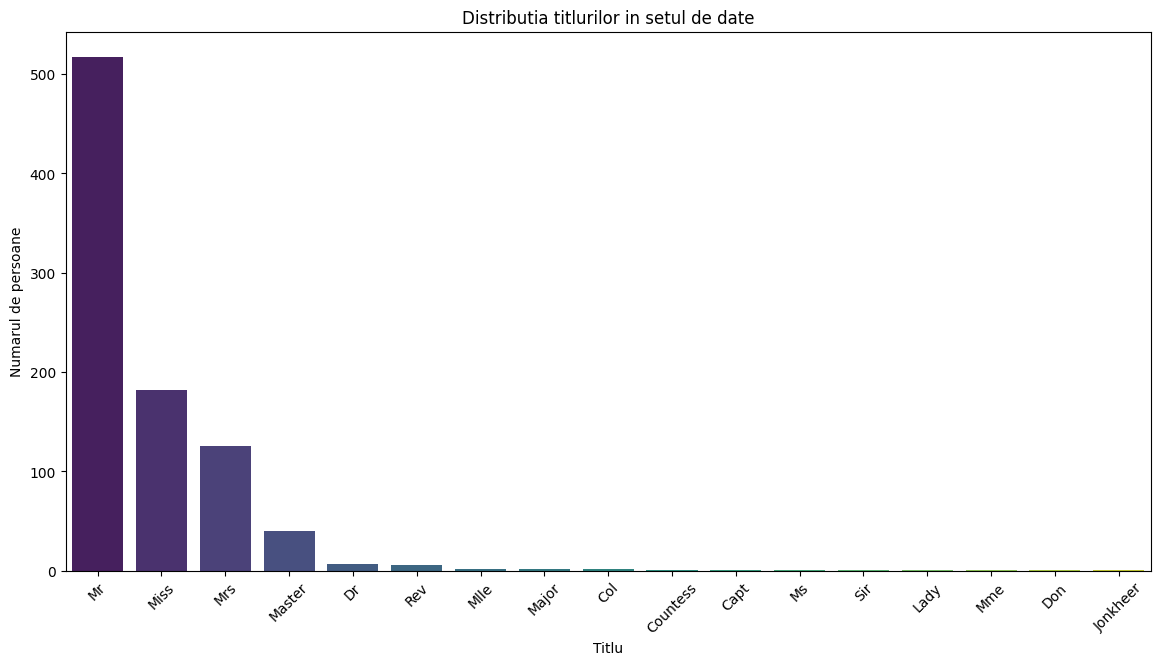

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 9
df = pd.read_csv('train.csv')

#extragerea titlurilor
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

#crearea unei tabele de corelatie între titluri si sex
cross_table = pd.crosstab(df['Title'], df['Sex'])

print(cross_table)
#dictionar pt titluri si sexele atribuite
expected_sex = {
    'Mr': 'male', 'Miss': 'female', 'Mrs': 'female', 'Master': 'male', 'Dr': None,
    'Rev': 'male', 'Mlle': 'female', 'Col': 'male', 'Major': 'male', 'Sir': 'male',
    'Don': 'male', 'Mme': 'female', 'Jonkheer': 'male', 'Lady': 'female',
    'Capt': 'male', 'Countess': 'female', 'Ms': 'female'
}
#aplicam dictionarul pe coloana title si mai facem o col in care atribuim sexul
df['Expected'] = df['Title'].map(expected_sex)
#o noua coloana in care avem true daca sexul este bun si false daca nu,dar in cazul lui doctor avem ambele sexe deci avem true oricum
df['Is_Correct'] = (df['Sex'] == df['Expected']) | (df['Expected'].isnull())
title_counts = df['Title'].value_counts()

summary = df.groupby('Title')['Is_Correct'].sum()
summary=(summary/title_counts)*100


print("Procentul de corectitudine a titlurilor atribuite în funcție de sex:")
print(summary)
plt.figure(figsize=(14, 7))

sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')
plt.title('Distributia titlurilor in setul de date')
plt.ylabel('Numarul de persoane')
plt.xlabel('Titlu')
plt.xticks(rotation=45)
plt.show()


C:\Users\thug\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thug\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thug\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

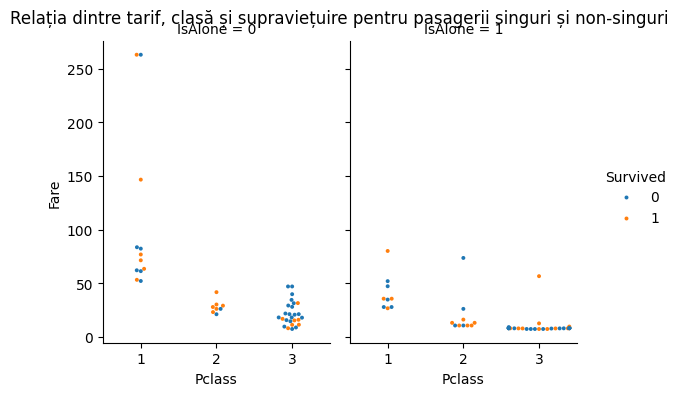

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Cerinta 10
df = pd.read_csv('train.csv')
#vedem daca sunt singuri sau nu
df['IsAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)

subset_df = df.head(100)

plt.figure(figsize=(10, 6))
sns.catplot(x="Pclass", y="Fare", hue="Survived", col="IsAlone",
            data=subset_df, kind="swarm",
            height=4, aspect=.7, s=8)

plt.subplots_adjust(top=0.9)
plt.suptitle('Relatia dintre tarif, clasa si supravietuire pentru pasagerii singuri si non-singuri')
plt.show()
